In [31]:
from mlwpy import *

# TensorFlow 경고 메시지가 출력되지 않도록 설정합니다.
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

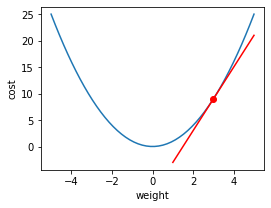

In [32]:
xs = np.linspace(-5,5)
ys = xs**2

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(xs, ys)

# 아래와 같이 간결하게 쓸 수도 있습니다: 
# pt = co.namedtuple('Point', ['x', 'y'])(3,3**2)
pt_x, pt_y = 3, 3**2
ax.plot(pt_x, pt_y, 'ro')

line_xs = pt_x + np.array([-2, 2])
# line ys = mid_point + (x amount) * slope_of_line
# 오른쪽으로 한걸음만 가면 “직선의 기울기”의 한 단위만큼 비용이 증가합니다.
line_ys = 3**2 + (line_xs - pt_x) * (2 * pt_x) 
ax.plot(line_xs, line_ys, 'r-')
ax.set_xlabel('weight')
ax.set_ylabel('cost');

Appoximate location of blue graph minimum: 0.0029296875


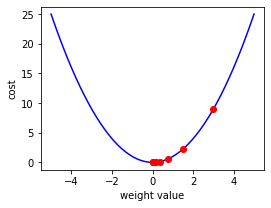

In [33]:
weights = np.linspace(-5,5)
costs   = weights**2

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(weights, costs, 'b')

# 최소점에 대한 현재 시점의 추측
weight_min = 3

# 시작점에서부터 내리막길을 따라갑니다.
# 그리고 파란색 그래프에서 가중치 값이 가장 작아지는 지점을 찾아냅니다. 
for i in range(10):
    # 현재 가중치로부터 비용을 계산합니다.
    cost_at_min = weight_min**2
    ax.plot(weight_min, cost_at_min, 'ro')

    # 그리고 미분을 이용해 기울기를 구할 수 있습니다.
    slope_at_min = 2*weight_min
    
    # 내리막길을 조금 내려가서 다음 가중치를 구합니다.
    step_size = .25
    weight_min = weight_min - step_size * slope_at_min

ax.set_xlabel('weight value')
ax.set_ylabel('cost')
print("Appoximate location of blue graph minimum:", weight_min)

In [34]:
from scipy.optimize import fmin as magical_minimum_finder
def f(x):
    return x**2

magical_minimum_finder(f, [3], disp=False)

array([-0.])

In [35]:
linreg_ftrs_p1 = np.c_[np.arange(10), np.ones(10)] # 플러스원 트릭

true_wgts  = m,b = w_1, w_0 = 3,2
linreg_tgt = rdot(true_wgts, linreg_ftrs_p1)

linreg_table = pd.DataFrame(linreg_ftrs_p1, 
                            columns=['ftr_1', 'ones'])
linreg_table['tgt'] = linreg_tgt
linreg_table[:3]

,ftr_1,ones,tgt
0,0.0000,1.0000,2.0000
1,1.0000,1.0000,5.0000
2,2.0000,1.0000,8.0000


In [36]:
def linreg_model(weights, ftrs):
    return rdot(weights, ftrs)

def linreg_loss(predicted, actual):
    errors = predicted - actual
    return np.dot(errors, errors) # 제곱합

def no_penalty(weights):
    return 0.0

In [37]:
def make_cost(ftrs, tgt, 
              model_func, loss_func, 
              c_tradeoff, complexity_penalty):
    ' 데이터, 모델, 손실, 페널티로부터 최적화 문제를 만듭니다. '
    def cost(weights):
        return (loss_func(model_func(weights, ftrs), tgt) + 
                c_tradeoff * complexity_penalty(weights))
    return cost

In [38]:
# 선형 회귀 최적화 문제를 설계합니다.
linreg_cost = make_cost(linreg_ftrs_p1, linreg_tgt, 
                        linreg_model, linreg_loss, 
                        0.0, no_penalty)
learned_wgts = magical_minimum_finder(linreg_cost, [5,5], disp=False)

print("   true weights:", true_wgts)
print("learned weights:", learned_wgts)

   true weights: (3, 2)
learned weights: [3. 2.]


In [39]:
def L1_penalty(weights):
    return np.abs(weights).sum()

def L2_penalty(weights):
    return np.dot(weights, weights) 

In [40]:
# L1 정규화를 사용한 선형 회귀 (라쏘 회귀)
linreg_L1_pen_cost = make_cost(linreg_ftrs_p1, linreg_tgt, 
                               linreg_model, linreg_loss, 
                               1.0, L1_penalty)
learned_wgts = magical_minimum_finder(linreg_L1_pen_cost, [5,5], disp=False)

print("   true weights:", true_wgts)
print("learned weights:", learned_wgts)

   true weights: (3, 2)
learned weights: [3.0212 1.8545]


In [41]:
# L2 정규화를 사용한 선형 회귀 (릿지 회귀)
linreg_L2_pen_cost = make_cost(linreg_ftrs_p1, linreg_tgt, 
                               linreg_model, linreg_loss, 
                               1.0, L2_penalty)
learned_wgts = magical_minimum_finder(linreg_L2_pen_cost, [5,5], disp=False)

print("   true weights:", true_wgts)
print("learned weights:", learned_wgts)

   true weights: (3, 2)
learned weights: [3.0508 1.6102]


In [42]:
logreg_ftr = np.random.uniform(5,15, size=(100,))

true_wgts  = m,b = -2, 20
line_of_logodds = m*logreg_ftr + b
prob_at_x = np.exp(line_of_logodds) / (1 + np.exp(line_of_logodds))

logreg_tgt = np.random.binomial(1, prob_at_x, len(logreg_ftr))

logreg_ftrs_p1 = np.c_[logreg_ftr,
                       np.ones_like(logreg_ftr)]

logreg_table = pd.DataFrame(logreg_ftrs_p1, 
                            columns=['ftr_1','ones'])
logreg_table['tgt'] = logreg_tgt
display(logreg_table.head())

,ftr_1,ones,tgt
0,8.1701,1.0000,1
1,7.6647,1.0000,1
2,8.2395,1.0000,1
3,10.6196,1.0000,1
4,10.6161,1.0000,0


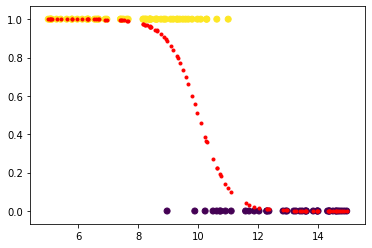

In [43]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(logreg_ftr, prob_at_x, 'r.')
ax.scatter(logreg_ftr, logreg_tgt, c=logreg_tgt);

In [44]:
# 로지스틱 회귀 모델
def logreg_model(weights, ftrs):
    return rdot(weights, ftrs)

def logreg_loss_01(predicted, actual):
    # sum(-actual log(predicted) - (1-actual) log(1-predicted))
    # 타깃값이 0/1인 경우 다음과 같이 표현할 수 있습니다.
    return np.sum(- predicted * actual + np.log(1+np.exp(predicted)))

In [45]:
logreg_cost = make_cost(logreg_ftrs_p1, logreg_tgt, 
                        logreg_model, logreg_loss_01,
                        0.0, no_penalty)
learned_wgts = magical_minimum_finder(logreg_cost, [5,5], disp=False)

print("   true weights:", true_wgts)
print("learned weights:", learned_wgts)

   true weights: (-2, 20)
learned weights: [-2.3171 24.0075]


In [46]:
# 페널티를 적용한 로지스틱 회귀
logreg_pen_cost = make_cost(logreg_ftrs_p1, logreg_tgt, 
                            logreg_model, logreg_loss_01, 
                            0.5, L1_penalty)
learned_wgts = magical_minimum_finder(logreg_pen_cost, [5,5], disp=False)
print("   true weights:", true_wgts)
print("learned weights:", learned_wgts)

   true weights: (-2, 20)
learned weights: [-1.3268 13.8411]


In [47]:
def binary_to_pm1(b):
    ' {0,1} 또는 {False,True}을 {-1, +1}에 매핑합니다. '
    return (b*2)-1
binary_to_pm1(0), binary_to_pm1(1)

(-1, 1)

In [48]:
# 로지스틱 회귀
def logreg_model(weights, ftrs):
    return rdot(weights, ftrs)

def logreg_loss_pm1(predicted, actual):
    # -actual log(predicted) - (1-actual) log(1-predicted)
    # -1/+1 타깃을 적용하면 수식은 다음과 같습니다.
    return np.sum(np.log(1+np.exp(-predicted*actual)))

In [49]:
logreg_cost = make_cost(logreg_ftrs_p1, binary_to_pm1(logreg_tgt), 
                        logreg_model, logreg_loss_pm1,
                        0.0, no_penalty)
learned_wgts = magical_minimum_finder(logreg_cost, [5,5], disp=False)

print("   true weights:", true_wgts)
print("learned weights:", learned_wgts)

   true weights: (-2, 20)
learned weights: [-2.3171 24.0075]


In [50]:
def predict_with_logreg_weights_to_pm1(w_hat, x):
    prob = 1 / (1 + np.exp(rdot(w_hat, x)))
    thresh = prob < .5
    return binary_to_pm1(thresh)

preds = predict_with_logreg_weights_to_pm1(learned_wgts, logreg_ftrs_p1)
print(metrics.accuracy_score(preds, binary_to_pm1(logreg_tgt)))

0.95


In [51]:
# SVC
def hinge_loss(predicted, actual):
    hinge = np.maximum(1-predicted*actual, 0.0)
    return np.sum(hinge)

def predict_with_svm_weights(w_hat, x):
    return np.sign(rdot(w_hat,x)).astype(np.int)

In [52]:
svm_ftrs = logreg_ftrs_p1
svm_tgt  = binary_to_pm1(logreg_tgt)  # SVM은 +/- 1 형식을 필요로 합니다.

# SVM 모델은 rdot입니다. 따로 구현할 필요가 없죠.
svc_cost = make_cost(svm_ftrs, svm_tgt, rdot, 
                     hinge_loss, 0.0, no_penalty)
learned_weights = magical_minimum_finder(svc_cost, [5,5], disp=False)

preds = predict_with_svm_weights(learned_weights, svm_ftrs)
print('no penalty accuracy:', 
      metrics.accuracy_score(preds, svm_tgt))


no penalty accuracy: 0.95


In [53]:
# 페널티를 추가한 SVC
svc_pen_cost = make_cost(svm_ftrs, svm_tgt, rdot, 
                         hinge_loss, 1.0, L1_penalty)
learned_weights = magical_minimum_finder(svc_pen_cost, [5,5], disp=False)

preds = predict_with_svm_weights(learned_weights, svm_ftrs)
print('accuracy with penalty:', 
      metrics.accuracy_score(preds, svm_tgt))

accuracy with penalty: 0.94


In [54]:
# keras가 설치되어 있지 않다면 다음 명령어로 설치합니다
#(부록 B를 참고하여 필요한 라이브러리와 패키지를 이미 설치했다면 바로 이어서 실습하면 됩니다.)
# conda install keras=2.3.1
import keras.layers as kl
import keras.models as km
import keras.optimizers as ko

In [55]:
def Keras_LinearRegression(n_ftrs):
    model = km.Sequential()
    # Dense 층은 기본으로 “bias” (+1 트릭)를 포함합니다.
    model.add(kl.Dense(1, 
                       activation='linear',
                       input_dim=n_ftrs))
    model.compile(optimizer=ko.SGD(lr=0.01), loss='mse')
    return model

In [56]:
# 여러가지 이유로 Keras의 +1 트릭을 사용합니다.
# 그러므로 1로 채워진 열을 사용하지 않습니다.
linreg_ftrs = linreg_ftrs_p1[:,0]

linreg_nn = Keras_LinearRegression(1)
history = linreg_nn.fit(linreg_ftrs, linreg_tgt, epochs=1000, verbose=0)
preds = linreg_nn.predict(linreg_ftrs)

mse = metrics.mean_squared_error(preds, linreg_tgt)

print("Training MSE: {:5.4f}".format(mse))

Training MSE: 0.0000


In [57]:
history.history['loss'][:5]

[187.1727752685547,
 32.94295120239258,
 6.2909698486328125,
 1.6797469854354858,
 0.876422107219696]

In [58]:
def Keras_LogisticRegression(n_ftrs):
    model = km.Sequential()
    model.add(kl.Dense(1, 
                       activation='sigmoid',
                       input_dim=n_ftrs))
    model.compile(optimizer=ko.SGD(), loss='binary_crossentropy')
    return model


logreg_nn = Keras_LogisticRegression(1)
history = logreg_nn.fit(logreg_ftr, logreg_tgt, epochs=1000, verbose=0)

# 확률값을 출력합니다.
preds = logreg_nn.predict(logreg_ftr) > .5
print('accuracy:', metrics.accuracy_score(preds, logreg_tgt))

accuracy: 0.92


In [59]:
from keras.utils import to_categorical as k_to_categorical
def Keras_MultiLogisticRegression(n_ftrs, n_classes):
    model = km.Sequential()
    model.add(kl.Dense(n_classes, 
                       activation='softmax',
                       input_dim=n_ftrs))
    model.compile(optimizer=ko.SGD(), loss='categorical_crossentropy')
    return model

logreg_nn2 = Keras_MultiLogisticRegression(1, 2)
history = logreg_nn2.fit(logreg_ftr, 
                         k_to_categorical(logreg_tgt), 
                         epochs=1000, verbose=0)

# 클래스별로 확률값을 출력합니다.
# 확률값이 가장 큰 클래스를 선택합니다.
preds = logreg_nn2.predict(logreg_ftr).argmax(axis=1)
print(metrics.accuracy_score(logreg_tgt, preds))

0.93
